Loaded 118 product features from 118 images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Top 5 similar products to ../data/raw/202304050305392.jpeg:
Rank 1: Image: ../data/raw\1572515542825e4e2e433-e29b-4ca1-abb2-aad995574f2a_1.e4dc9f20c1d8b2999d66556ae0aa1600.jpeg | Similarity: 1.0000
Rank 2: Image: ../data/raw\202304050305392.jpeg | Similarity: 1.0000
Rank 3: Image: ../data/raw\202304050307522.jpeg | Similarity: 1.0000
Rank 4: Image: ../data/raw\202311060413042.jpeg | Similarity: 0.9997
Rank 5: Image: ../data/raw\lalacrybabydoll.jpg | Similarity: 0.7891


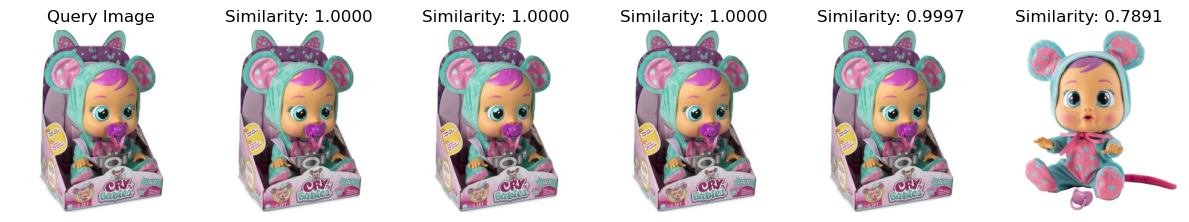

In [27]:
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tqdm import tqdm

# Load pretrained ResNet50 (exclude final classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Load saved features and image paths
features = np.load('../features/resnet50_features.npy')
with open('../features/image_paths.pkl', 'rb') as f:
    image_paths = pickle.load(f)

print(f"Loaded {len(features)} product features from {len(image_paths)} images.")

def find_similar_products(query_feature, features, image_paths, top_k=5):
    # Compute cosine similarities between query feature and all stored features
    similarities = cosine_similarity([query_feature], features)
    
    # Sort the similarities and get the top K most similar products
    similar_indices = similarities.argsort()[0][-top_k:][::-1]
    
    # Return the top K similar image paths and their similarities
    similar_products = [(image_paths[i], similarities[0][i]) for i in similar_indices]
    return similar_products

def preprocess_and_extract(image_path, model):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = preprocess_input(img)  # Preprocessing for ResNet50
    
    # Extract feature vector
    feature = model.predict(np.expand_dims(img, axis=0)).flatten()
    return feature

def search_similar_product(query_image_path, model, features, image_paths, top_k=5):
    # Extract feature for query image
    query_feature = preprocess_and_extract(query_image_path, model)
    
    # Find similar products
    similar_products = find_similar_products(query_feature, features, image_paths, top_k)
    
    # Display results
    print(f"Top {top_k} similar products to {query_image_path}:")
    for idx, (img_path, similarity) in enumerate(similar_products):
        print(f"Rank {idx + 1}: Image: {img_path} | Similarity: {similarity:.4f}")
        
    return similar_products

def display_similar_images(query_image_path, similar_products, top_k):
    # Display the query image
    query_img = cv2.imread(query_image_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    
    # Prepare the figure
    plt.figure(figsize=(12, 8))
    
    # Display the query image
    plt.subplot(2, top_k + 1, 1)
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    
    # Display similar images
    for idx, (img_path, similarity) in enumerate(similar_products):
        similar_img = cv2.imread(img_path)
        similar_img = cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(2, top_k + 1, idx + 2)
        plt.imshow(similar_img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
query_image_path = '../data/raw/202304050305392.jpeg'  # Path to query image
top_k = 5  # Define top_k here
similar_products = search_similar_product(query_image_path, model, features, image_paths, top_k)

# Display the similar images
display_similar_images(query_image_path, similar_products, top_k)
